# Project Business Statistics: E-news Express


## Problem Statement

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. 

## Objectives :
Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the existing landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests.

The aim of performing statistical analysis to answer the above questions is to decide wether the new landing page is more effective to attract and bring in new subscribers for the online news portal.The answers of the questions obtained from the statistical analysis performed will help make a decision and business recommendations.

## Data Dictionary:

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

## Import all the necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for plots and data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style='darkgrid') 

# import  library that contains a large number of probability  distributions 
# as well  a growing library of statistical functions
import scipy.stats as stats

# Library to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# Read the dataset abtest.csv into a DataFrame
df = pd.read_csv("abtest.csv") 


### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
# returns and shows the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


**Observation :** The DataFrame has 6 columns as mentioned in the Data Dictionary.

In [4]:
# returns the number of rows and columns of the DataFrame
df.shape

(100, 6)

**Observation :** There are 100 rows and 6 columns in this dataset.

In [5]:
# Returns information about the DataFrame including the data types of each column and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [6]:
# Checking for  missing values in the dataset
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observation :** 
* There are 4 object data type columns.The group,landing_page,converted and language_preferred columns are object data type columns.
* There are 2 numerical columns: user_id column is an integer data type and time_spent_on_the_page column is a float data type.
* The memory usage is 4.8+ KB
* There are no missing values in this dataset.There are 100 non-null observations in each column which also indicates that there are no missing values in this datase

#### Fixing the datatypes

In [7]:
# Converting the following attributes of the dataframe from object to categorical data type
df["group"] = df["group"].astype("category")
df["landing_page"] = df["landing_page"].astype("category") 
df["converted"] = df["converted"].astype("category")
df["language_preferred"] = df["language_preferred"].astype("category")

# Returns information about the dataframe including the data types of each column and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


**Observations :**

* There are now 4 categorical columns and 2 numerical columns.
* Converting group,landing_page,converted and language_preferred columns from object data type to category data type has led to a reduced memory usage from 4.8+ KB to 2.6 KB

#### Statistical Summary of the data


In [8]:
# Returns the statistical summary of the numerical variables of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [9]:
# Returns  number of distinct observations over user_id column
df["user_id"].nunique()

100

**Observations:**

From the summary of numerical variables :

* The average time spent by users on the landing page is ~ 5.38 minutes.
* The minimum time spent on the page by users is 0.19 minutes and the maximum time spent on the page by users is 10.71 minutes.
* The mean and the median time_spent_on_the_page values are almost equal.
* There are 100 distinct(unique) users in this dataset.

In [10]:
# Returns the summary of categorical or non-numeric variables of the data
df.describe(exclude='number').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


In [11]:
# Making a list of  categorical variables 
cat_col=[ "group", "landing_page","converted","language_preferred"]

# Printing number of count of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*50)

control      50
treatment    50
Name: group, dtype: int64
--------------------------------------------------
new    50
old    50
Name: landing_page, dtype: int64
--------------------------------------------------
yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------
French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------


**Observation:**

From the summary of non-numerical variables :

* There are 2 unique groups in this dataset :control and treatment.Each group have 50 users.
* There are 2 landing pages : old and new.
* There are 54 users (which represents the majority) from this dataset that converted to subscribers after visiting the landing page and 46 users did not get convert to subscribers after visiting the landing page.
* There are 3 unique languages in this dataset that users use to view the landing page :French,Spanish and English.English is the least used language by users.

### Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="pink"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="autumn"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle = "dashed"
    )  # Add mean to the histogram (broken green line)
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle = "-"
    )  # Add median to the histogram (black line)   


**1. User_id:**

In [13]:
# Returns  number of distinct observations over user_id column
df["user_id"].nunique()

100

**Observation:**There are 100 unique users.

**2.Time_spent_on_the_page :**

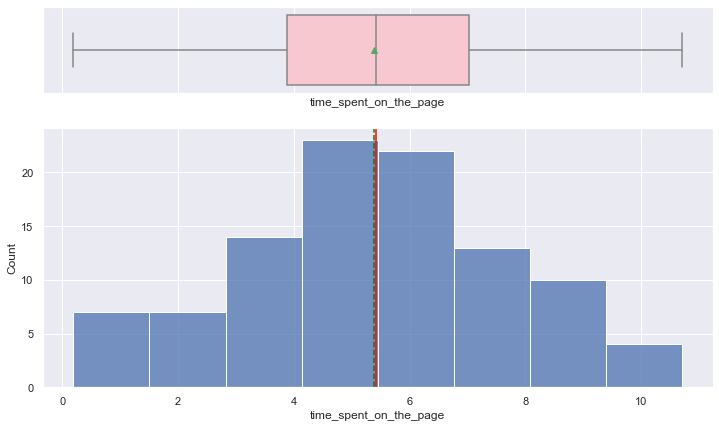

In [14]:
# Creating a boxplot and histogram for the time_spent_on_the_page variable
# inorder to see the shape its data distribution 
histogram_boxplot(df, "time_spent_on_the_page")

**Observations :**
* There are no outliers for time_spent_on_the_page.
* The time_spent_on_the_page distribution shows an almost symmetrical distribution(zero skewness).
* The time spent on the page by users ranges from ~0.2(minimum ) to ~10.7(maximum) minutes.
* Majority of users(represented by the 2 highest peaks) in this dataset spend about 5 and 6 minutes on the landing page.

##### Exploring Categorical Variables

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=40, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="tab10", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

**Group:**

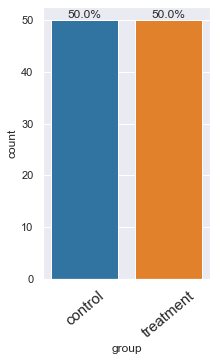

In [16]:
# Creating a labeled barplot of group variable
labeled_barplot(df, "group", perc=True)

**Observations :**
* The observations are uniformly distributed across the groups.

**Landing page :**

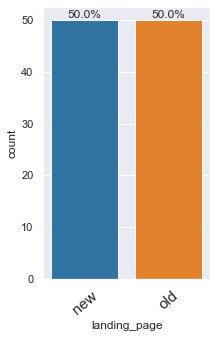

In [17]:
# Creating a labeled barplot of landing_page variable
labeled_barplot(df, "landing_page", perc=True)

**Observations :**
* The observations are uniformly distributed across the landing pages.

**Converted :**

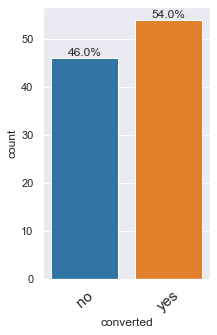

In [18]:
# Creating a labeled barplot of converted variable
labeled_barplot(df, "converted", perc=True)

**Observations :**
* 54.0% of users (which represents majority of users),in the dataset converted to subscribers of the news portal and 46.0% of users in the dataset did not convert to suscribers of the news portal.

**Language preferred :**

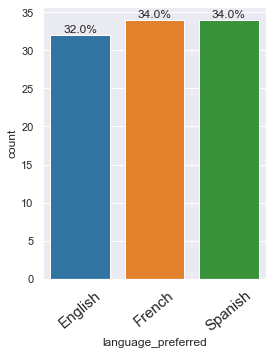

In [19]:
# Creating a labeled barplot of language_preferred variable
labeled_barplot(df, "language_preferred", perc=True)

**Observations :**
* 34.0% of users choose French language to view the landing page.
* 34.0% of users choose Spanish language to view the landing page.
* And 32.0% of users(which represents the least used by users) choose english language to view the landing page.

### Bivariate Analysis

**1. Time spent on the page vs group :**

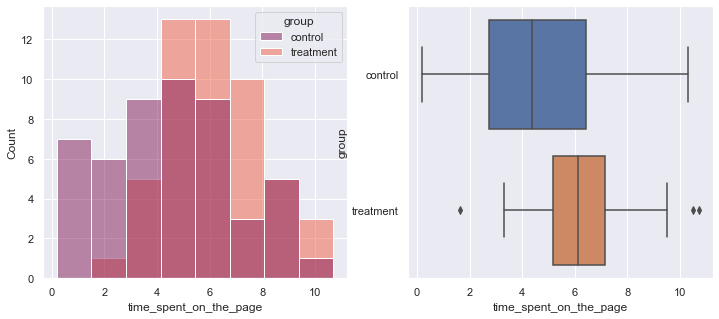

In [20]:
# Plotting a histogram and a box plot of time_spent_on_the_page vs group
plt.figure(figsize=(12, 5)) 
plt.subplot(1,2,1,) # creating  2 subplots
sns.histplot(data = df, x = "time_spent_on_the_page" , hue ="group",palette="rocket") # a histogram
# will be created 

plt.subplot(1,2,2)
sns.boxplot(df["time_spent_on_the_page"],df["group"]) # a boxplot will be created 
plt.show()

**Observations :**
* Most users that spend the maximum(the most) amount of time belong to the treatment group.
* Majority of users spend about 5 and 6 minutes on the landing page and are from the treatment group.
* Most users from the control group also spend about 5 minutes on the landing page.
* The lowest or minimum time spent by users are from the control group.
* On the boxplot,outliers are seen only on the treatment group of users.

**2. Time_spent_on_the_page Vs Landing page :**

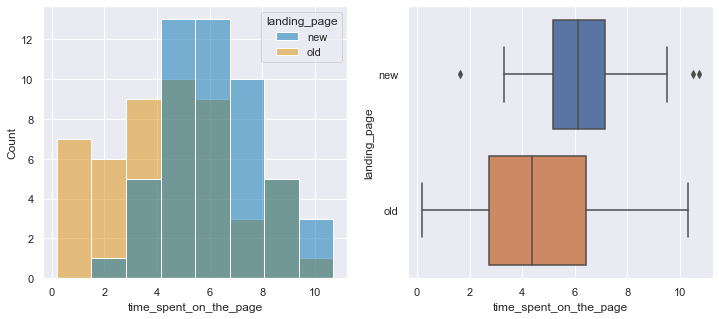

In [21]:
# Plotting a histogram and a box plot of time_spent_on_the_page vs Landing page
plt.figure(figsize=(12, 5)) 
plt.subplot(1,2,1,) # creating  2 subplots
# a histogram will be created 
sns.histplot(data = df, x = "time_spent_on_the_page", hue = "landing_page",palette="colorblind")

plt.subplot(1,2,2)
# a boxplot will be created
sns.boxplot(df["time_spent_on_the_page"],df["landing_page"])
plt.show()

**Observations :**
* Majority of users spend about 5 and 6 minutes on the new landing page.
* The majority of users that spend the maximum amount of(the most) time view the new landing page.
* The lowest amount of time is spent by users that view the old landing page.
* Majority of users on the old landing page spend about 5 minutes.
* On the box plot,outliers is seen only on the new landing page.

**3. Time_spent_on_the_page Vs Converted :**

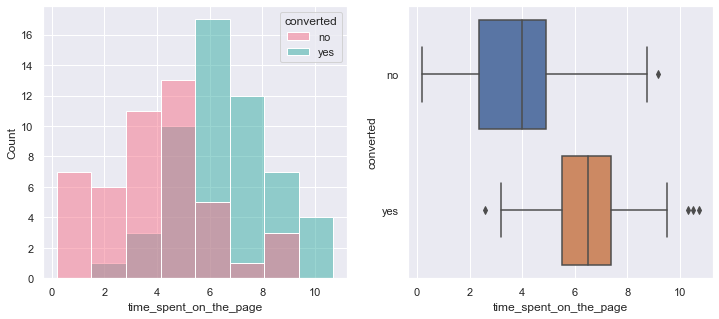

In [22]:
# Plotting a histogram and a box plot of time_spent_on_the_page vs Language_preferred
plt.figure(figsize=(12, 5)) 
plt.subplot(1,2,1,) # creating  2 subplots
# a histogram will be created 
sns.histplot(data = df, x = "time_spent_on_the_page", hue = "converted",palette="husl")

plt.subplot(1,2,2)
# a boxplot will be created
sns.boxplot(df["time_spent_on_the_page"],df["converted"])
plt.show()

**Observations :**
* Users who spent the highest time on the landing page converted to subscribers of the news portal.
* Majority of users who spent about 6 minutes on the landing page converted to subscribers of the news portal.
* Users who spent the lowest time on the landing page did not convert to subscribers of the news portal.
* On the boxplot of time_spent_on_the_page vs Converted,outliers are seen on both the users that converted to subscribers and those that did not convert to subscribers.

**4. Time_spent_on_the_page vs Language_preferred :**

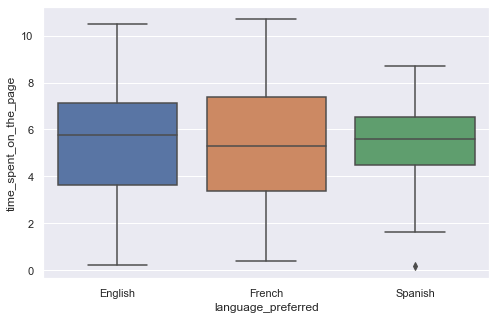

In [23]:
# Plotting a boxplot of time_spent_on_the_page vs Language_preferred
plt.figure(figsize=(8, 5)) 
sns.boxplot(df["language_preferred"],df["time_spent_on_the_page"])
plt.show()

**Observations :**
* Users that choosed French language spent the maximum time to view the landing page.
* Users that choosed Spanish language spent the lowest time to view the landing page.
* Outliers is seen only on the spanish language.

**5. Converted vs Landing_page :**

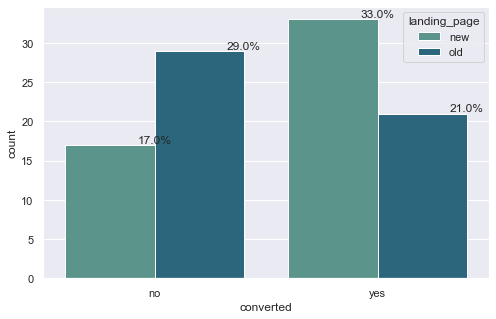

In [24]:
# Plotting a labeled bar plot of Converted vs Landing_page
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="converted", hue="landing_page", data=df,palette="crest")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x, y), ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points")
plt.show()

**Observations :**
* 33.0% of users who viewed the new landing page,converted to subscribers of the news portal.These users constitute the majority of those that converted to subscribers of the news portal.21.0% of users who viewed the old landing page,converted to subscribers.
* On the otherhand,29.0% of users who viewed the old landing page,did not convert to subscribers of the news portal.These users constitute the majority of those who did not convert to subscribers of the news portal.17.0% of users who viewed the new landing page,did not convert to subscribers.

**6.Converted vs Language_preferred :**

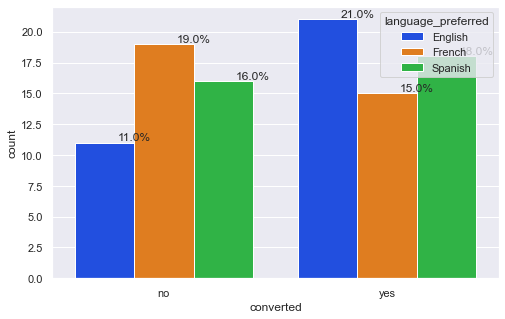

In [25]:
# Plotting  a labeled bar plot of Converted vs language_preferred
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="converted", hue="language_preferred", data=df,palette="bright")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x, y), ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points")
plt.show()

**Observations :**
* 21.0% of users that choosed English language to view the landing page, converted to subscribers of the news portal.These users constitute the majority of those that converted to subscibers.18.0% of users who choosed French language,converted to subscribers of the news portal.15.0% of the users(the minority in this case) that choosed Spanish language to view the page converted to subscribers of the news portal.
* On the otherhand,19.0% of users that choosed french language to view the landing page,did not convert to subscribers of the news portal.These users are the majority of those that did not convert to subscribers.16.0% of users who choosed Spanish language to view the landing page did not convert to subscribers.11.0% of the users(the minority in this case) that choosed English language to view the page did not convert to subscribers of the news portal.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

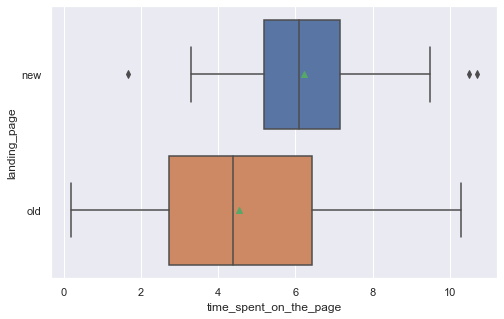

In [26]:
# Visual analysis of the time spent on the new landing page
# and the time spent on the old existing landing page
plt.figure(figsize=(8, 5)) 
sns.boxplot(df["time_spent_on_the_page"],df["landing_page"],showmeans=True)
plt.show()

In [27]:
# Finding the mean time spent on the new and old landing page
df.groupby(["landing_page"])["time_spent_on_the_page"].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

**Observations:**
* The mean and median time spent on the page by users is higher on the new landing page than the old landing page
* Outliers are seen on the new landing page.

### Step 1: Define the null and alternate hypotheses

$H_0:$ The mean time spent on the new landing page is equal to the mean time spent on the old existing page.

$H_a:$ The mean time spent on the new landing page is greater to the mean time spent on the old existing page.

Let $\mu_1$ and $\mu_2$ be the mean time spent on the new landing page and the mean time spent on the old existing page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

### Step 2: Select Appropriate test

This is a case of a one-tailed two-sample mean test.The two samples are two independent populations(treatment group and control group) and moreover,the population standard deviations are unknown.Hence,**a two independent sample t-test will be appropriate for this case.**

### Step 3: Decide the significance level

As given in the problem statement,α = 0.05 is selected as the significance level.

### Step 4: Collect and prepare data

In [28]:
# Filtering the data to seperate the time spent by users on the new landing page from the rest of data
time_spent_on_new_page = df[df["landing_page"]=="new"]["time_spent_on_the_page"]

# Filtering the data to seperate the time spent by users on old existing page from the rest of data
time_spent_on_old_page = df[df["landing_page"]=="old"]["time_spent_on_the_page"]

In [29]:
# Calculating the sample standard deviation of the time spent on the new landing page
# and storing it in a variable std_new
std_new = time_spent_on_new_page.std()

# Calculating the sample standard deviation of the time spent on the old landing page
# and storing it in a variable std_old
std_old = time_spent_on_old_page.std()

In [30]:
# Printing the value of the sample standard deviation of the time spent on the new landing page
print("The standard deviation of the time spent on the new landing page is :",round(std_new,2))

# Printing the value of the sample standard deviation of the time spent on the 
# old existing landing page
print("The standard deviation of the time spent on the old existing landing page is :",
      round(std_old,2))

# Comparing both samples standard deviations 

The standard deviation of the time spent on the new landing page is : 1.82
The standard deviation of the time spent on the old existing landing page is : 2.58


**Observation:**
The standard deviations for both samples(time spent on the new landing page and time spent on the old existing landing page) are unequal. As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

In [31]:
#import the required function to carry out the two independent sample t-test 
from scipy.stats import ttest_ind

#  calculating the p-value
test_stat, p_value = ttest_ind(df[df["landing_page"]=="new"]["time_spent_on_the_page"], 
                               df[df["landing_page"]=="old"]["time_spent_on_the_page"],
                               equal_var = False,alternative = 'greater')
print('The p-value is ', p_value)


The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [32]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f"As the p-value {p_value} is less than the level of significance,we reject the null hypothesis.")
else:
    print(f"As the p-value {p_value} is greater than the level of significance,we fail to reject the null hypothesis.")

As the p-value 0.0001392381225166549 is less than the level of significance,we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value(~0.000139) is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the users spend more time on the new landing page than the old existing landing page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

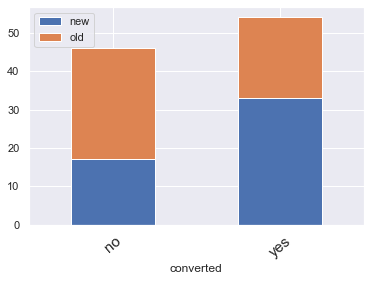

In [33]:
# Visual analysis of the conversion rate for the new page and that for the old page
# Creating a stacked bar plot to compare the distributions of two categorical variables-
# converted and landing page
pd.crosstab(df["converted"],df["landing_page"]).plot(kind='bar',stacked =True)
plt.legend()
plt.xticks(rotation=40, fontsize=15)
plt.show()

**Observation:**
* From the above visual analysis,the proportion of users who visit the new landing page and get converted to subscribers of the news portal is more than the proportion of users who visit the old landing page and get converted to subscribers of the news portal.

### Step 1: Define the null and alternative hypotheses

$H_0:$ The proportion of users who visit the new landing page and get converted is equal to the proportion of users who visit the old landing page and get converted.

$H_a:$ The proportion of users who visit the new landing page and get converted is greater than the proportion of users who visit the old landing page and get converted.

Let $p_1$ and $p_2$  be the proportions of users who visit the new landing page and the old landing page and get converted ,respectfully.

Mathematically, the above formulated hypotheses can be written as:

$H_0: p_1 = p_2$

$H_a: p_1 > p_2$

### Step 2: Select Appropriate test

* This is a case of a one-tailed test concerned with two populations proportions from two independent populations(treatment group and control group).**Therefore, a two proportions z-test will be appropriate for this case.**

### Step 3: Decide the significance level

As given in the problem statement,α = 0.05 is selected as the significance level.

### Step 4: Collect and prepare data

In [34]:
# Finding the number of users who visit the new landing page and get converted
users_new_converted = df[df["landing_page"]=="new"]["converted"].value_counts()['yes']

# Finding the number of users who visit the old landing page and get converted
users_old_converted = df[df["landing_page"]=="old"]["converted"].value_counts()['yes']

# Printing the values of the users who visit the new landing page and get converted and
# "The number of users who visit the old landing page and get converted
print("The number of users who visit the new landing page and get converted is :",users_new_converted)
print("The number of users who visit the old landing page and get converted is :",users_old_converted)

The number of users who visit the new landing page and get converted is : 33
The number of users who visit the old landing page and get converted is : 21


In [35]:
# Finding the total number of users who visits the new landing page-the treatment group
n_users_new = df["landing_page"].value_counts()["new"]

# Finding the total number of users who visits the old landing page-the control group
n_users_old = df["landing_page"].value_counts()["old"]

# Printing the total number of users served the new landing page and 
# the total number of users served the old landing page
print("The total number of users served the new landing page is :",n_users_new)
print("The total number of users served the old landing page is :",n_users_old)

The total number of users served the new landing page is : 50
The total number of users served the old landing page is : 50


**Observation:**
* From the above calculations,it's seen that the proportion of users who visit the new landing page and get converted(33/50) is greater than the proportion of users who visit the old landing page and get converted(21/50).

### Step 5: Calculate the p-value

In [36]:
# import the required fuction to perform the two proportions z-test
from statsmodels.stats.proportion import proportions_ztest

# finding the p-value using proportion_ztest
test_stat, p_value = proportions_ztest([users_new_converted, users_old_converted] , 
                                       [n_users_new, n_users_old],alternative = 'larger')
# printing the p-value
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [37]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f"As the p-value {p_value} is less than the level of significance,we reject the null hypothesis.")
else:
    print(f"As the p-value {p_value} is greater than the level of significance,we fail to reject the null hypothesis.")

As the p-value 0.008026308204056278 is less than the level of significance,we reject the null hypothesis.


### Step 7:  Draw inference

Since the pvalue(~0.008) is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.

### Step 7:  Draw inference

Since the pvalue(~0.008) is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

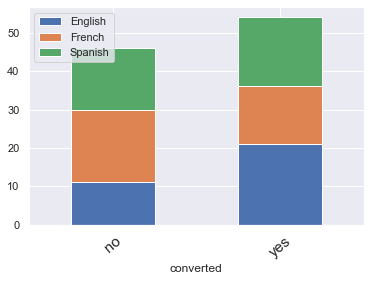

In [38]:
# Visual analysis of  conversion and preferred language
# Creating a stacked bar plot to compare the distributions of two categorical variables-
# conversion and preferred language
pd.crosstab(df["converted"],df["language_preferred"]).plot(kind='bar',stacked =True)
plt.legend(loc = 'upper left')
plt.xticks(rotation=40, fontsize=15)
plt.show()

**Observation:**
* From the above plot,the count of the users who choosed english language got the highest number of conversion.
* On the otherhand,the count of users who choosed french language got the lowest number of conversion.

### Step 1: Define the null and alternative hypotheses

$H_0:$ Conversion is independent of preferred language.

$H_a:$ Conversion is **NOT independent** of the preferred language.

### Step 2: Select Appropriate test

This is a case which involves the test of independence of two categorical variables-converted and language_preferred.Therefore,the formulated hypotheses can be appropriately tested **using a Chi-square test of independence.**

### Step 3: Decide the significance level

As given in the problem statement, 𝛼 = 0.05 is selected as the significance level.

### Step 4: Collect and prepare data

In [39]:
# creating a contingency table showing the distribution of the two categorical variables-converted
# and language_preferred
contingency_table = pd.crosstab(df["converted"],df["language_preferred"])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


**Observation:**
* A two-by-two contingency table was created , with the counts of 'language_preferred' (English, French, or Spanish)in the rows and the counts of 'converted ' (Yes or No) in the columns.

### Step 5: Calculate the p-value

In [40]:
# import the required function required to carryout the Chi-square test of independence.
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [41]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f"As the p-value {p_value} is less than the level of significance,we reject the null hypothesis.")
else:
    print(f"As the p-value {p_value} is greater than the level of significance,we fail to reject the null hypothesis.")

As the p-value 0.21298887487543447 is greater than the level of significance,we fail to reject the null hypothesis.


### Step 7:  Draw inference

At 5% significance level, we fail to reject the null hypothesis. Hence we have enough statistical evidence to say that conversion is independent on the preferred language.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

In [42]:
# First Extracting the data for users who viewed the new landing page
# and storing it in the variable data
data = df[df["landing_page"]=="new"]

# Viewing the first 5 rows to  ensure the treatment group has been extracted inorder to proceed
data.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


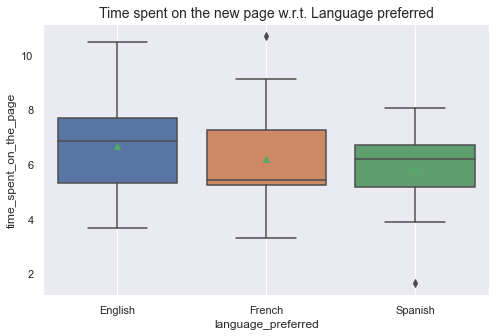

In [43]:
# visual analysis of time spent on the new landing page for different language users
plt.figure(figsize=(8, 5))
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data = data,showmeans=True)
           
plt.title("Time spent on the new page w.r.t. Language preferred",fontsize=14)
plt.grid()
plt.show()

In [44]:
 # Finding the mean time spent on the new landing page for different language users
data.groupby(["language_preferred"])["time_spent_on_the_page"].mean().sort_values(ascending=False)

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

**Observations:**

From the above we see that,
* The distribution of mean time spent on the new page differs(though not very much) among the three different language users.
* The English language users have the highest mean time spent on the new page.
* The Spanish language users have the lowest mean time spent on the new page.

### Step 1: Define the null and alternative hypotheses

$H_0:$ The mean time spent on the new page for the different language users is equal.

$H_a:$ At least one of the mean time spent on the new page for the different language users is different.

### Step 2: Select Appropriate test

This is a case that concerns the means of three populations.Hence,**One-way ANOVA test is the appropriate test** used here provided the assumptions of normality and equality of variance are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable(time spent on the new page).
* For equality of variance, Levene test is applied to the response variable(time spent on the new page).

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The time spent on the new page follow a normal distribution

will be tested against the alternative hypothesis.

>$H_a:$ The time spent on the new page do not not follow a normal distribution

In [45]:
# Assumption 1: Normality
# Using the shapiro function from the scipy.stats library for this test

# Calculating the p-value
w, p_value = stats.shapiro(data["time_spent_on_the_page"]) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


**Insight:**
Since p-value(~0.804) of the Shapiro-Wilk’s test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

will be tested against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [46]:
#Assumption 2: Homogeneity of Variance
# Using the levene function from scipy.stats library for this test

# Calculating the p-value
statistic, p_value = stats.levene(data[data["language_preferred"]=="English"]["time_spent_on_the_page"],
                            data[data["language_preferred"]=="French"]["time_spent_on_the_page"],
                            data[data["language_preferred"]=="Spanish"]["time_spent_on_the_page"])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


**Insight:**
Since the p-value(~0.467) is larger than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, 𝛼 = 0.05 is selected as the significance level.

### Step 4: Collect and prepare data

In [47]:
# Separating the time spent on the new page with respect to the three different language users
# and storing it into three different variables

# Time spent on the new page by English language users
time_spent_E = data[data["language_preferred"]=="English"]["time_spent_on_the_page"]

# Time spent on the new page by French language users                                                          time_spent_F = data[data["language_preferred"]=="French"]["time_spent_on_the_page"]
time_spent_F = data[data["language_preferred"]=="French"]["time_spent_on_the_page"]
                                                           
# Time spent on the new page by Spanish language users
time_spent_S = data[data["language_preferred"]=="Spanish"]["time_spent_on_the_page"]

### Step 5: Calculate the p-value

In [48]:
# import the required function to perform the one-way anova test
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = stats.f_oneway(time_spent_E, time_spent_F, time_spent_S)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with α

In [49]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

At the 5% significance level, we fail to reject the null hypothesis. Therefore, we have enough statistical evidence to say that the mean time spent on the new page is same for the different language users.

## Conclusion and Business Recommendations

### Conclusion :
I analyzed a dataset of the response of 100 randomly selected users divided into two groups(samples)-the treatment and the control group.The treatment group is served the new landing page and the control group is served the old landing page.My conclusions from the analysis made are:

* 54.0% of users in the dataset converted to subscribers of the news portal and 46.0% of users in the dataset did not convert to suscribers of the news portal.
* There are 3 unique languages in this dataset that users use to view the landing page.The most choosen language used, is the French and Spanish language.
* In this dataset,the time spent on the page by users ranges from ~0.19(minimum ) to ~10.7(maximum) minutes.The average time spent by users on the landing page is ~ 5.38 minutes.
* Visually when we compare the time spent on the page distribution of the two samples(treatment and control group),**it seems the users spend more time on the new landing page than the old landing page and hence statistically,we have enough evidence to say that this holds.**
* 33.0% of users who viewed the new landing page(treatment group) and 21.0% of users who viewed the old landing page(control group),converted to subscribers of the news portal.Visually,it seems the proportion of users who visit the new landing page and get converted to subscribers of the news portal is more than the proportion of users who visit the old landing page and get converted to subscribers of the news portal.Hence statistically,**we have enough evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page.**
* From the sample,21.0% of users who choosed English language,18.0% of users who choosed French language and 15.0% of users who choosed Spanish language to view the landing page, converted to subscribers of the news portal.Even though visually from the sample,it seems that the users who choosed English language had the highest converted status ,statistically,**there is not enough evidence to say that the converted status depends on the preferred language.**
* When we compare the sample mean time spent on the new landing page for different language users,even though visually it seems as if the mean time spent on the new landing page differs among the three different language users,**there is enough statistical evidence to say that the mean time spent on the new page is same for the different language users.**

### Business Recommendations :

* From the above analysis and conclusions,the new landing page created by the design team of the company which suggest that it might be more captivating as the users spend more time on it.The new landing page is hence more effective to gather new subscribers.If the new landing page is maintained and why not perfected ,it might gather many more subscribers.
* Eventhough statistically,they have been evidence that converted status is independent of preferred language which visually shows other wise,i think it's better for the company to carry out further investigations on users about this inorder to have a deeper insight and better viewers-news portal experience which might attract many more subscribers.
* I suggest the company should further investigate subscription method and find ways to facilitate subscription.This is because some users though they spent alot of time on the new landing page,yet they don't subscribe.May be subscription method to the news portal is quite complex or time demanding for some users which might find it quite hard to subscribe eventhough they enjoy the news portal .
